In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]


In [4]:
# CHECK DIAGONALLY DOMINANT
def checkDiagonallyDominant(x):
    x = np.array(x)

    diagonal = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis = 1)
    sumWithoutDiagonal = sumWithDiagonal - diagonal

    if np.all(diagonal > sumWithoutDiagonal):
        return True
    else:
        return False

In [5]:
# GAUSS SEIDEL
def gaussSeidel(x, y, tolerance, max):
    x = np.array(x)
    y = np.array(y)
    flag = 0

    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    xBefore = np.zeros(x.shape[0])
    for i in range(1, max + 1):
        xNew = np.array(xBefore)

        if flag == 0:
            for j, row in enumerate(x):
                print(f"X{j} = {y[j]}", end = " ")

                for k, ele in enumerate(row):
                    if j != k:
                        print(f" + ({ele}x{k})", end = " ")
                        
                print(f"/ {diagonal[j]}")
                flag = 1

        print(f"Iteration: {i}|", )
        for j, row in enumerate(x):
            xNew[j] = (y[j] + np.dot(row, xNew)) / diagonal[j]
            print(f"X{j + 1} = ", end = " ")
            print(format(xNew[j], ".9f"), end=" ")

        print("")
        distance = np.sqrt(np.dot(xNew - xBefore, xNew - xBefore))
        if distance < tolerance:
            return True
        xBefore = xNew
        
    return False

In [6]:
for i, (x, y) in enumerate(zip(mX, mY)):
    if(checkDiagonallyDominant(x)):
        print(gaussSeidel(x, y, 0.01456, 5))
    else:
        print("Not Diagonally Dominant")

X0 = 17  + (-2x1)  + (6x2) / 10
X1 = -4  + (1x0)  + (-2x2) / 4
X2 = -12  + (-2x0)  + (-3x1) / 6
Iteration: 1|
X1 =  1.700000000 X2 =  -0.575000000 X3 =  -2.279166667 
Iteration: 2|
X1 =  0.447500000 X2 =  0.251458333 X3 =  -2.274895833 
Iteration: 3|
X1 =  0.284770833 X2 =  0.208640625 X3 =  -2.199243924 
Iteration: 4|
X1 =  0.338725521 X2 =  0.184303342 X3 =  -2.205060178 
Iteration: 5|
X1 =  0.340103225 X2 =  0.187555895 X3 =  -2.207145689 
True
Not Diagonally Dominant
X0 = 9  + (5x1)  + (-3x2)  + (0x3) / 10
X1 = 10  + (-3x0)  + (-2x2)  + (2x3) / -9
X2 = -10  + (8x0)  + (0x1)  + (4x3) / 17
X3 = -18  + (-3x0)  + (3x1)  + (8x2) / -15
Iteration: 1|
X1 =  0.900000000 X2 =  -0.811111111 X3 =  -0.164705882 X4 =  1.630065359 
Iteration: 2|
X1 =  0.543856209 X2 =  -1.328663762 X3 =  0.051241830 X4 =  1.547175018 
Iteration: 3|
X1 =  0.220295570 X2 =  -1.370108852 X3 =  -0.120525610 X4 =  1.582361210 
Iteration: 4|
X1 =  0.251103257 X2 =  -1.405829319 X3 =  -0.097748771 X4 =  1.583519193 
Ite

In [7]:
# LEAST SQUARE FIT
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

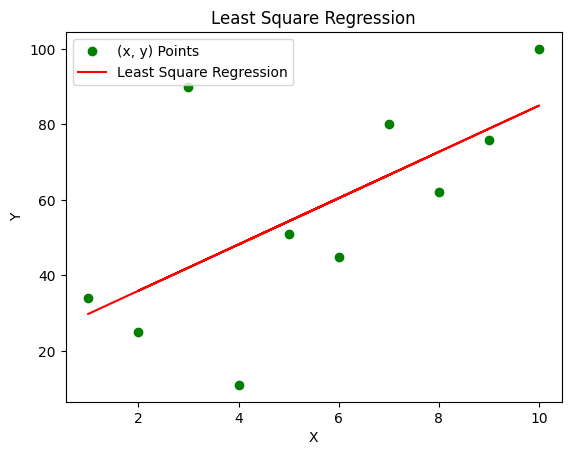

In [8]:
A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)

invers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(invers, A.T), Y)

m = beta[0]
c = beta[1]

yb = m*lx + c
plt.plot(lx, ly, "go", label = "(x, y) Points")
plt.plot(lx, yb, "r-", label = "Least Square Regression")
plt.legend(loc = "upper left")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Least Square Regression")
plt.show()

In [9]:
x = symbols('x')

f1 = lambda x : 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

print(df1(1))

f2 = lambda x : 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def newtonRaphson(f, df, x, tolerance, limit):
    if limit == 6:
        return False
    
    if limit > 0:
        print(f"Iteration {limit}, root :  {x}")
        
    if np.abs(f(x)) < tolerance:
        print(x)
        return True
    
    return newtonRaphson(f, df, x - (f(x)/df(x)), tolerance, limit + 1)
    
print(newtonRaphson(f1, df1, 1, 0.006541, 0))
print(newtonRaphson(f2, df2, 1, 0.006541, 0))

23
Iteration 1, root :  0.782608695652174
Iteration 2, root :  0.6210684619745717
Iteration 3, root :  0.4941304782745192
Iteration 4, root :  0.3675198418052212
Iteration 5, root :  -0.11948918023737432
False
Iteration 1, root :  0.8382352941176471
Iteration 2, root :  0.7357300136098767
Iteration 3, root :  0.6956565368667311
Iteration 4, root :  0.6903195287760319
0.6903195287760319
True


In [10]:
f = lambda x : 3*x**4 - 7*x**2 + 5

limUnder = -4
limUpper = 3
n = 30

x = np.linspace(limUnder, limUpper, n)
width = (limUpper - limUnder) / (n - 1)

xLeft = x[:-1]
xRight = x[1:]
xMid = (xLeft + xRight) / 2

yLeft = f(xLeft)
yRight = f(xRight)
yMid = f(xMid)

leftRiemann = width * np.sum(np.abs(yLeft))
rightRiemann = width * np.sum(np.abs(yRight))
midRiemann = width * np.sum(np.abs(yMid))

trapezoid = width * np.sum(np.abs(yLeft)  + (np.abs(yRight))) / 2

print("Left Riemann: ", leftRiemann)
print("Right Riemann: ", rightRiemann)
print("Mid Riemann: ", midRiemann)
print("Trapezoid: ", trapezoid)

Left Riemann:  645.1387652149571
Right Riemann:  530.2422134908192
Mid Riemann:  580.4556464297783
Trapezoid:  587.690489352888
